In [1]:
using PyPlot

INFO: Precompiling module PyPlot.


# Tarea 1

Fecha de envío del PR inicial: **26 de febrero**

Fecha de aceptación del PR: **12 de marzo**


## 1. Raíces de una ecuación de segundo grado

Implementen en julia una función que devuelva las raíces de una ecuación de segundo grado general con coeficientes reales. La función debe ser estable según el tipo ([type-stable](http://docs.julialang.org/en/release-0.5/manual/faq/?highlight=type%20stability#what-does-type-stable-mean)), lo que significa que el tipo del resultado sólamente depende del tipo de las entradas. En particular, muestren que su función devuelve raíces consistentes para $a=1$, $b=1$, $c=10^{-17}$.

La función debe estar documentada de manera apropiada, lo que significa que, al correr el Jupyter notebook de su tarea, la instrucción
```julia
? nombre_funcion
```
debe dar información apropiada.

Incluyan cualquier comentario prudente del algoritmo que usan, ya sea en el notebook (usando markdown) o en la propia función incluyendo comentarios.


In [2]:
doc"""
raices(a,b,c)

Esta función calcula las raíces de un polinomio de segundo grado de la forma

\$ax^2 + bx + c = 0\$

con **a**, **b** y **c** reales utilizando

\$ x_{+-} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}\$

Para estabilidad numerica se utiliza la ecuacion


\$ x_{1} = \frac{-b - sign(b) \sqrt{b^2-4ac}}{2a}\$
\$ x_{2} = \frac{2c}{-b - sign(b) \sqrt{b^2-4ac}}\$

Esto permite corregir los errores por redondeo cuando $ac << 1$.

[Referencia 1](https://people.csail.mit.edu/bkph/articles/Quadratics.pdf)

[Referencia 2](http://math.stackexchange.com/questions/866331/numerically-stable-algorithm-for-solving-the-quadratic-equation-when-a-is-very)

El algoritmo evalúa el discriminante $\Delta = b^2-4ac$ y hace los cálculos necesarios:
1. si $\Delta = 0$ la función regresa $\frac{-b}{2a}$
2. si $\Delta < 0$ la función regresa el comentario "La función no tiene raíces reales"
3. si $\Delta > 0$ la función regresa $X_{+}, X_{-}$
"""

function raices(a,b,c)
    
    if a == 0    
        println("El polinomio no es de segundo grado.")
        return
        
    elseif imag(a) != 0 || imag(b) != 0 || imag(c) != 0
        println("El polinomio no tiene coeficientes reales.")
        return
        
    end
    
    det = b^2. - 4. * a * c

    if det < 0
        println(typeof(det))
        println("El polinomio no tiene raíces reales.")
        return
        
    elseif det == 0
        return /(-b , (2 * a)), /(-b , (2 * a))
        
    else
#         return /(-b + sqrt(det), 2 * a), /(-b - sqrt(det), 2 * a)   
        return /(- b - sign(b) * sqrt(det), 2 * a), /(2 * c, - b - sign(b) * sqrt(det))   
    end
end

raices

In [3]:
@code_warntype(raices(1,2,1))

Variables:
  #self#::#raices
  a::Int64
  b::Int64
  c::Int64
  det::Any
  #temp#@_6::Bool
  #temp#@_7::Bool

Body:
  begin 
      NewvarNode(:(det::Any))
      unless (a::Int64 === 0)::Bool goto 10 # line 33:
      # meta: location coreio.jl println 5
      SSAValue(2) = (Core.typeassert)(Base.STDOUT,Base.IO)::IO
      # meta: pop location
      (Base.print)(SSAValue(2),"El polinomio no es de segundo grado.",'\n')::Void # line 34:
      return
      10:  # line 36:
      SSAValue(0) = (Base.box)(Base.Bool,(Base.not_int)((0 === 0)::Bool))
      unless SSAValue(0) goto 16
      #temp#@_6::Bool = SSAValue(0)
      goto 25
      16: 
      SSAValue(1) = (Base.box)(Base.Bool,(Base.not_int)((0 === 0)::Bool))
      unless SSAValue(1) goto 21
      #temp#@_7::Bool = SSAValue(1)
      goto 23
      21: 
      #temp#@_7::Bool = (Base.box)(Base.Bool,(Base.not_int)((0 === 0)::Bool))
      23: 
      #temp#@_6::Bool = #temp#@_7::Bool
      25: 
      unless #temp#@_6::Bool goto 34 # line 37:
     

In [4]:
? raices

search: RandomDevice



raices(a,b,c)

Esta función calcula las raíces de un polinomio de segundo grado de la forma

$ax^2 + bx + c = 0$

con **a**, **b** y **c** reales utilizando

$ x_{+-} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$

Para estabilidad numerica se utiliza la ecuacion

$ x_{1} = \frac{-b - sign(b) \sqrt{b^2-4ac}}{2a}$ $ x_{2} = \frac{2c}{-b - sign(b) \sqrt{b^2-4ac}}$

Esto permite corregir los errores por redondeo cuando $ac << 1$.

[Referencia 1](https://people.csail.mit.edu/bkph/articles/Quadratics.pdf)

[Referencia 2](http://math.stackexchange.com/questions/866331/numerically-stable-algorithm-for-solving-the-quadratic-equation-when-a-is-very)

El algoritmo evalúa el discriminante $\Delta = b^2-4ac$ y hace los cálculos necesarios:

1. si $\Delta = 0$ la función regresa $\frac{-b}{2a}$
2. si $\Delta < 0$ la función regresa el comentario "La función no tiene raíces reales"
3. si $\Delta > 0$ la función regresa $X_{+}, X_{-}$


In [5]:
ints = [1,2,1]
x = raices(ints...)
println(x)
println(typeof(ints))
println(typeof(x))

(-1.0,-1.0)
Array{Int64,1}
Tuple{Float64,Float64}


In [6]:
abc = (1., 1., 1e-17)
x = raices(abc...)
println(x)
println(typeof(x))
println(typeof(abc))

(-1.0,-1.0e-17)
Tuple{Float64,Float64}
Tuple{Float64,Float64,Float64}


## 2. Promedio y varianza

(a) Escriban dos funciones (`promedio` y `varianza`) que calculen el promedio y la varianza de un vector de datos.

In [7]:
doc"""
promedio(arreglo)

Función que calcula el promedio aritmético de los elementos de un arreglo utilizando

$\bar{x} = \frac{1}{n} \sum_{1}^{n} x_i$
"""

function promedio(arreglo)

    n = length(arreglo)     # Obtenemos la longitud del arreglo.
    promedio = 0.0          # Declaramos la variable promedio.
    
    for num = arreglo       # Hacemos la suma de todos los elementos del arreglo.
        promedio += num
    end
    
    promedio /= n           # Se calcula el promedio.
    
    return promedio
end

promedio(rand(2^20));  # llamamos a la función para que la compile.

0.5000159591616927

In [8]:
doc"""
varianza(arreglo)

Función que calcula la varianza de los elementos de un arreglo utilizando

$ \sigma = (\frac{1}{n} \sum_{1}^{n} x_{i}^{2}) - \bar{x}^{2} $
"""

function varianza(arreglo)
    n = length(arreglo)      # Se calcula la longitud del arreglo.    
    p = promedio(arreglo)    # Se calcula el promedio para ser utilizado en el calculo de la varianza.
    σ = 0.0                  # Se declara la variable que guardara el valor de la varianza.
    
    for num = arreglo        # Se itera una suma respecto a todo el arreglo.
        σ += (num - p)^2 
    end
    
    σ /= n                   # Se calcula la varianza.
    return σ
end

varianza(randn(1000));  # llamamos a la función para que la compile.

1.0391321872740222

(b) Comparen su resultado con lo que se obtiene al utilizar `mean` y `var`, que son las funciones nativas de Julia que hacen eso. En particular, consideren el siguiente vector de datos
```julia
v = 1.0e7 + randn(10^8)
```
¿Qué hace la función `randn(10^8)`?

La función randn(n) genera un arreglo de longitud n de valores aleatorios con distribución normal de varianza 1.

Por alguna razón ni mi maquina ni juliabox me dejan usar randn(10^8), cuando trato de utilizarlo se muere el kernel.

In [9]:
v = 1.0e7 + randn(10^6);

In [10]:
p, m = promedio(v), mean(v)

(1.0000000001265269e7,1.0000000001265155e7)

In [11]:
t_mine_prom = @elapsed promedio(v)
t_native_prom = @elapsed mean(v)

println("tiempo de promedio = ", t_mine_prom)
println("tiempo de mean = ", t_native_prom)
println(100 * t_mine_prom / t_native_prom, "% mas lento")

tiempo de promedio = 0.001256133
tiempo de mean = 0.000898404
139.81827774586935% mas lento


In [12]:
vf, vn = varianza(v), var(v)

(1.0005613709159829,1.0005623714783332)

In [13]:
t_mine_vari = @elapsed varianza(v)
t_native_vari = @elapsed var(v)

println("tiempo de varianza = ", t_mine_vari)
println("tiempo de var = ", t_native_vari)
println(100 * t_mine_vari / t_native_vari, "% más lento")

tiempo de varianza = 0.002391539
tiempo de var = 0.000850491
281.1950978905126% más lento


(c) Implementen el [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que  calcula el promedio (`promedio_rec`) y la varianza (`varianza_rec`) con una sóla lectura de los datos. Usen sus fuciones en el vector anterior y comparen sus resultados con los obtenidos en (a).

In [14]:
doc"""
prom_var_rec(arreglo)

regresa un arreglo con (promedio, varianza)

Función que calcula el promedio y la varianza con una sola lectura de los datos implementando el algoritmo recursivo encontrado [aqui](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm).
"""

function prom_var_rec(arreglo)
    n = 0.0
    promedio = 0.0
    M2 = 0.0
    
    for x = arreglo
        n += 1.0                                     # Contador de iteraciones
        promedio += (x - promedio) / n               # Actualizo el promedio
        M2 += (1.0 - 1.0 / n) * (x - promedio)^2.0   # Actualizo la varianza
    end   
    
    M2 /= (n - 1.0)
     
    return promedio, M2 
end

prom_var_rec(randn(1000000)); # llamamos a la función para que la compile.

(-0.0002174109027328044,1.0001512765711533)

In [15]:
?prom_var_rec

search:



prom_var_rec(arreglo)

regresa un arreglo con (promedio, varianza)

Función que calcula el promedio y la varianza con una sola lectura de los datos implementando el algoritmo recursivo encontrado [aqui](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm).


In [16]:
t_rec = @elapsed prom_var_rec(v)

0.019391722

In [17]:
prom_rec, var_rec = prom_var_rec(v)

(1.0000000001265258e7,1.0005355922277372)

In [18]:
println("función promedio ", p)
println("función mean     ", m)
println("función prom_rec ", prom_rec)

función promedio 1.0000000001265269e7
función mean     1.0000000001265155e7
función prom_rec 1.0000000001265258e7


In [19]:
println("función varianza ", vf)
println("función var      ", vn)
println("función var_rec  ", var_rec)

función varianza 1.0005613709159829
función var      1.0005623714783332
función var_rec  1.0005355922277372


(d) ¿Cuál de todos los algoritmos es el más rápido? (Pueden usar `@time` o `@elapsed`.) Usen vectores de varias longitudes, que cubran varios órdenes de magnitud.

In [20]:
n = 25
tiempos_pro = zeros(n)
tiempos_nat = zeros(n)
tiempos_rec = zeros(n)

for i = 1:n
    l = 1e6 + randn(2^i)
    
    tiempos_rec[i] = @elapsed prom_var_rec(l)
    tiempos_pro[i] = @elapsed promedio(l), varianza(l)
    tiempos_nat[i] = @elapsed mean(l), var(l)
end

log_rec = log.(tiempos_rec)
log_pro = log.(tiempos_pro)
log_nat = log.(tiempos_nat);

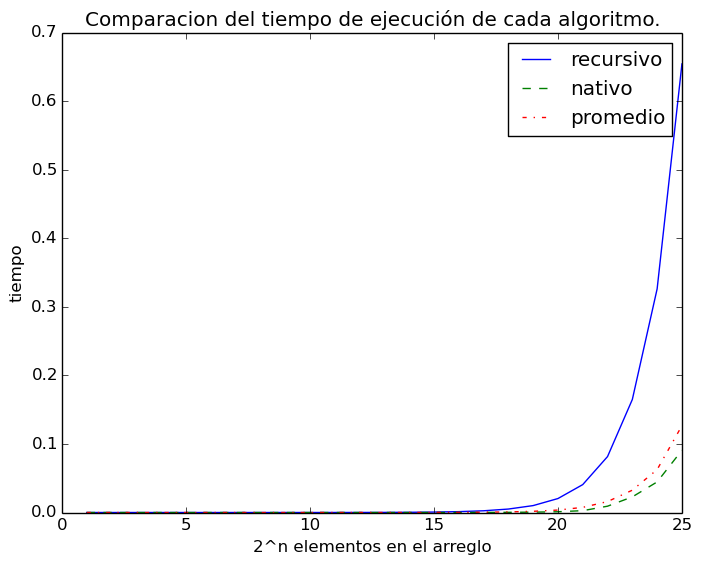

PyObject <matplotlib.text.Text object at 0x7f931369aa50>

In [21]:
plot(1:n, tiempos_rec,  linestyle = "-",  label = "recursivo")
plot(1:n, tiempos_nat,  linestyle = "--", label = "nativo")
plot(1:n, tiempos_pro,  linestyle = "-.", label = "promedio")
legend(loc="best")
ylabel("tiempo")
xlabel("2^n elementos en el arreglo")


title("Comparacion del tiempo de ejecución de cada algoritmo.")

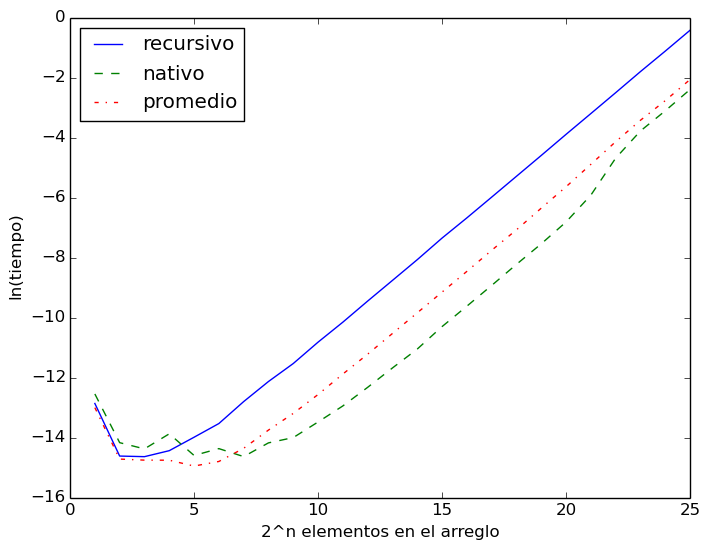

PyObject <matplotlib.text.Text object at 0x7f93136d0e10>

In [22]:
plot(1:n, log_rec,  linestyle = "-",  label = "recursivo")
plot(1:n, log_nat,  linestyle = "--", label = "nativo")
plot(1:n, log_pro,  linestyle = "-.", label = "promedio")
legend(loc="best")
ylabel("ln(tiempo)")
xlabel("2^n elementos en el arreglo")

Podemos ver que hay un rango de $2^1$ a $2^6$ donde tanto el algoritmo recursivo como el no recursivo son más rápidos que el nativo, pero para longitudes mayores del arreglo, el algoritmo nativo es más rápido.

## 3. Método de Simpson para integrar $f(x)$ en un intervalo dado

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

En análisis numérico, la regla o método de Simpson (nombrada así en honor de Thomas Simpson) y a veces llamada regla de Kepler es un método de integración numérica que se utiliza para obtener la aproximación de la integral:



$ \int_{a}^{b} f(x) dx \approx \frac{b-a}{6}[f(a) + 4f(\frac{a+b}{2})+f(b)]$


In [23]:
doc"""
integrador(f, a, b, n)

f función a integrar
a, b los límites de integración
n el número de elementos de la partición

Función que calcula el área bajo la función **f** de **a** a **b** utilizando el algoritmo de Simpson de la forma

$ \int_{a}^{b} f(x) dx \approx \frac{b-a}{6}[f(a) + 4f(\frac{a+b}{2})+f(b)]$

este realiza la aproximación para cada paso de la partición

$ \int_{a}^{b} f(x) dx = \sum_{i=1}^{n-1} \int_{h_{i}}^{h_{i+1}} f(x) dx \approx \sum_{i=1}^{n-1} \frac{\Delta}{6}[f(h_{i}) + 4f(h_{i} + \frac{\Delta}{2})+f(h_{i + 1})]$

El error es calculado de acuerdo a 

$ \delta A = \frac{\Delta ^5}{90} |f^{4}(h_{i} + \Delta)|$

regresa una tupla con (area, error)

"""


function integrador(f, a, b, n = 1000)

    h = linspace(a, b, n)                          # Se define la particion.
    Δ = (b - a) / n                                # Se define el tamaño del paso de integracion.
    
    err_max = 0.0                                  # Se declaran variables para guardar el area y el error.
    area = 0.0
    
    for i = h
        area += Δ * (f(i) + 4 * f(i + 0.5 * Δ) + f(i + Δ)) / 6
        
        err = Δ^5 * abs(f(i + 0.5 * Δ))^4 / 90     # Se calcula el error del paso, el error reportado sera el mayor
        if (err > err_max)                         # calculado para el intervalo de integracion.
            err_max = err
        end
    end
    
    return area, err_max
end

integrador(x->x^2-2, 0, 1);  # Compilamos la funcion

(-1.6659994998331682,1.7777768888890556e-16)

In [24]:
?integrador

search:



integrador(f, a, b, n)

f función a integrar a, b los límites de integración n el número de elementos de la partición

Función que calcula el área bajo la función **f** de **a** a **b** utilizando el algoritmo de Simpson de la forma

$ \int_{a}^{b} f(x) dx \approx \frac{b-a}{6}[f(a) + 4f(\frac{a+b}{2})+f(b)]$

este realiza la aproximación para cada paso de la partición

$ \int_{a}^{b} f(x) dx = \sum_{i=1}^{n-1} \int_{h_{i}}^{h_{i+1}} f(x) dx \approx \sum_{i=1}^{n-1} \frac{\Delta}{6}[f(h_{i}) + 4f(h_{i} + \frac{\Delta}{2})+f(h_{i + 1})]$

El error es calculado de acuerdo a 

$ \delta A = \frac{\Delta ^5}{90} |f^{4}(h_{i} + \Delta)|$

regresa una tupla con (area, error)


Para mostrar el comportamiento del integrador realizaremos la siguiente integral

$ \int_0^x \sin(x)dx = 1 - cos(x)$ 

In [25]:
f(x) = sin(x)
int_f(x) = 1 - cos(x)

int_f (generic function with 1 method)

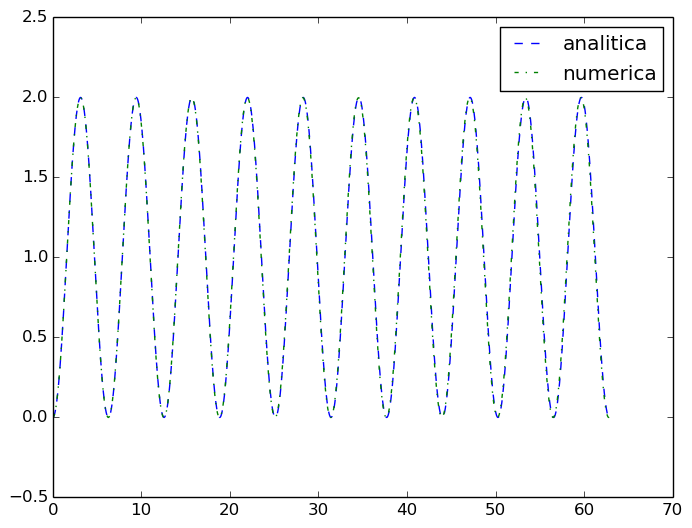

In [26]:
rango = 0.0:0.01:(20 * pi)
func = int_f(rango)
int = similar(rango)
er = similar(rango)

for (i, j) = enumerate(rango)
    int[i], er[i] = integrador(f, 0.0, j)
    
end

plot(rango, func, linestyle = "--", label = "analitica")
plot(rango, int,  linestyle = "-.", label = "numerica")

legend()
ylim(-0.5,2.5);

$\int_0^x (3x^2 - 1) dx = x^3 - x$

In [27]:
g(x) = 3 * x.^2 - 1
int_g(x) = x.^3 - x

int_g (generic function with 1 method)

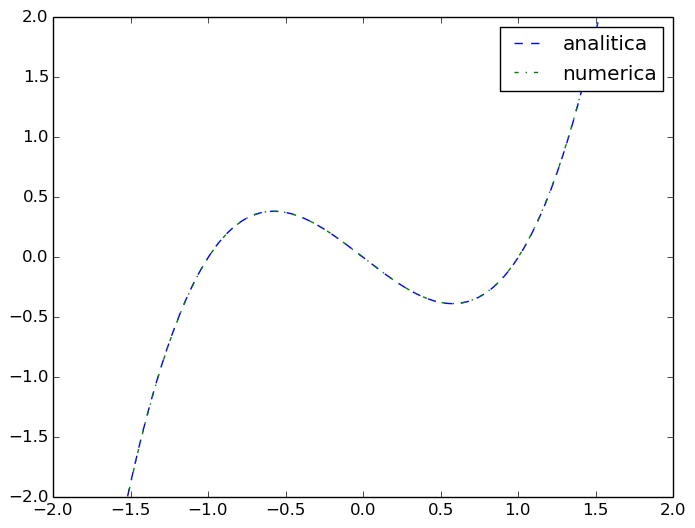

In [28]:
rango = -2:0.01:2
func = int_g(rango)
int = similar(rango)
er = similar(rango)

for (i, j) = enumerate(rango)
    int[i], er[i] = integrador(g, 0, j)
end

plot(rango, func, linestyle = "--", label = "analitica")
plot(rango, int,  linestyle = "-.",label = "numerica")
legend()
ylim(-2,2)
xlim(-2,2);